In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
x=np.array([95,85,80,70,60])
y=np.array([85,95,70,65,70]) 

In [3]:
model= np.polyfit(x, y, 1) 

In [4]:
model 

array([ 0.64383562, 26.78082192])

In [5]:
predict = np.poly1d(model) 
predict(65)

68.63013698630135

In [7]:
y_pred= predict(x)
y_pred 

array([87.94520548, 81.50684932, 78.28767123, 71.84931507, 65.4109589 ])

In [8]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.4803218090889323

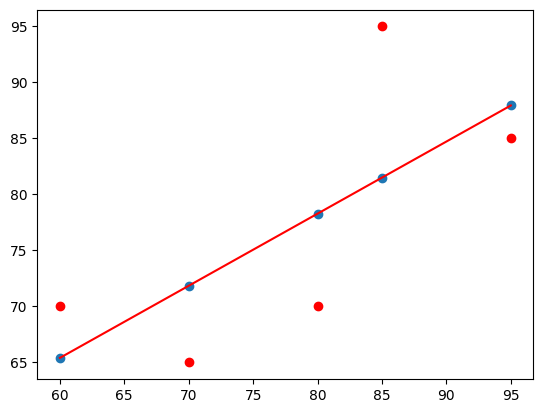

In [9]:
y_line = model[1] + model[0]* x
plt.plot(x, y_line, c = 'r')
plt.scatter(x, y_pred)
plt.scatter(x,y,c='r')

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

In [40]:
boston = fetch_openml(data_id=531,parser='auto')
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data['PRICE'] = boston.target


In [48]:
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
x = pd.DataFrame(imputer.fit_transform(data.drop(['PRICE'] , axis=1)),
columns=data.drop(['PRICE'],axis=1).columns)
y = data['PRICE']
data = data.dropna()
x = x.loc[data.index]

In [49]:

xtrain, xtest, ytrain, ytest =train_test_split(x, y, test_size =0.2,random_state = 0) 

In [50]:
lm = LinearRegression()
model=lm.fit(xtrain, ytrain) 
ytrain_pred = lm.predict(xtrain)
ytest_pred = lm.predict(xtest) 
df=pd.DataFrame(ytrain_pred,ytrain)
df=pd.DataFrame(ytest_pred,ytest) 

In [51]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(ytest, ytest_pred)
print(mse)
mse = mean_squared_error(ytrain_pred,ytrain)
print(mse)

33.44897999767657
19.326470203585725


In [52]:
mse = mean_squared_error(ytest, ytest_pred)
print(mse)

33.44897999767657


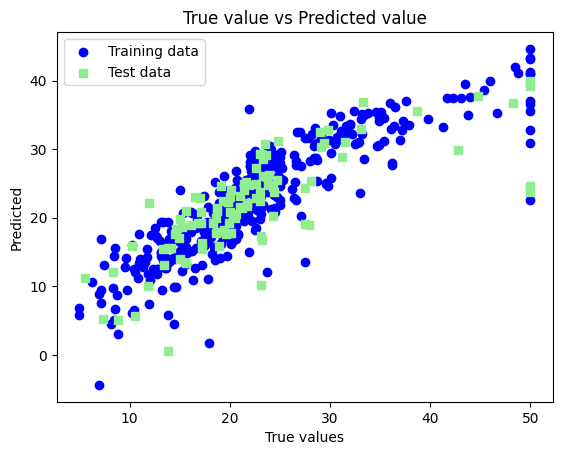

In [53]:
plt.scatter(ytrain ,ytrain_pred,c='blue',marker='o',label='Training data')
plt.scatter(ytest,ytest_pred ,c='lightgreen',marker='s',label='Test data') 
plt.xlabel('True values')
plt.ylabel('Predicted')
plt.title("True value vs Predicted value") 
plt.legend(loc= 'upper left')
#plt.hlines(y=0,xmin=0,xmax=50) 
plt.plot()
plt.show()